In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [191]:
df=pd.read_csv("nehrunagar.csv")
df.head()

,date,population
0,30-01-2022,41
1,21-03-2022,46
2,11-04-2022,43
3,02-06-2022,47
4,23-07-2022,49


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        11 non-null     object
 1   population  11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [193]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [194]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-194-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [195]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
 from prophet import Prophet

In [201]:
population=df.groupby('date')['population'].sum().reset_index()

In [202]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [203]:
model=Prophet(interval_width=0.95)

In [204]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/zmxr3t0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/pyepxfbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37843', 'data', 'file=/tmp/tmpqki2d_87/zmxr3t0t.json', 'init=/tmp/tmpqki2d_87/pyepxfbw.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelgrzxzsqm/prophet_model-20230421063614.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:36:14 - cmdstanpy - INFO - Chain [1] start processing
INF

In [205]:
future_dates=model.make_future_dataframe(periods=30)

In [206]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-30  47.690532   39.738095   55.795605    47.690532    47.690532   
1  2022-02-06  47.691342   39.141852   55.998728    47.691342    47.691342   
2  2022-02-19  47.692845   40.232690   55.829760    47.692845    47.692845   
3  2022-03-21  47.696314   39.031620   55.889452    47.696314    47.696314   
4  2022-04-09  47.698511   38.934814   56.064473    47.698511    47.698511   
5  2022-05-11  47.702212   39.309989   55.764894    47.702212    47.702212   
6  2022-07-23  47.710654   39.682406   55.521909    47.710654    47.710654   
7  2022-11-04  47.722681   39.787822   56.311531    47.722681    47.722681   
8  2022-12-16  47.727538   39.900451   55.613941    47.727538    47.727538   
9  2023-02-02  47.733089   40.172621   55.375664    47.733089    47.733089   
10 2023-07-01  47.750320   39.607233   56.142738    47.750320    47.750320   
11 2023-07-02  47.750436   39.103957   56.133688    47.750436   

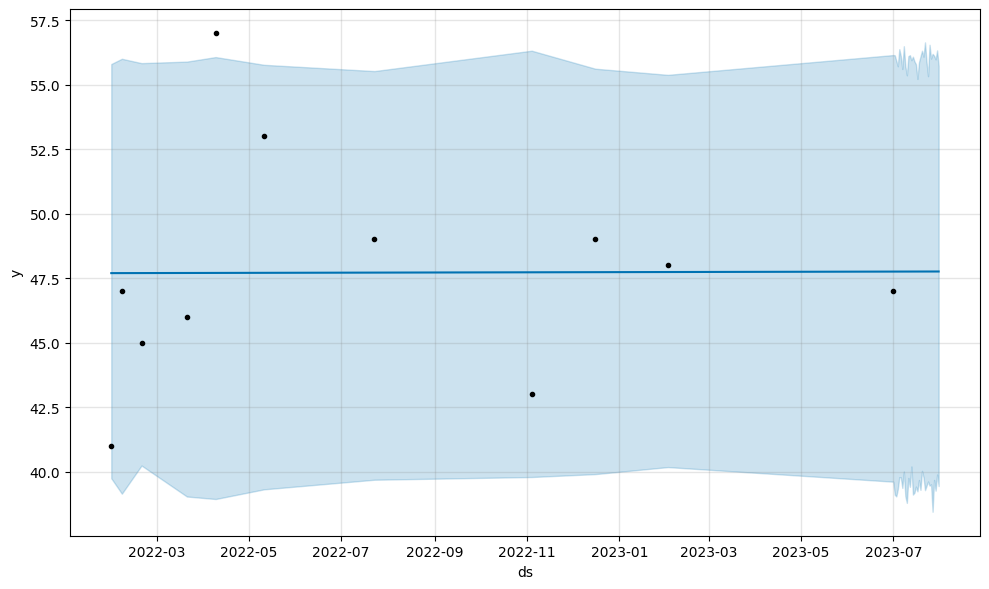

In [207]:
model.plot(forecast)
print(forecast)

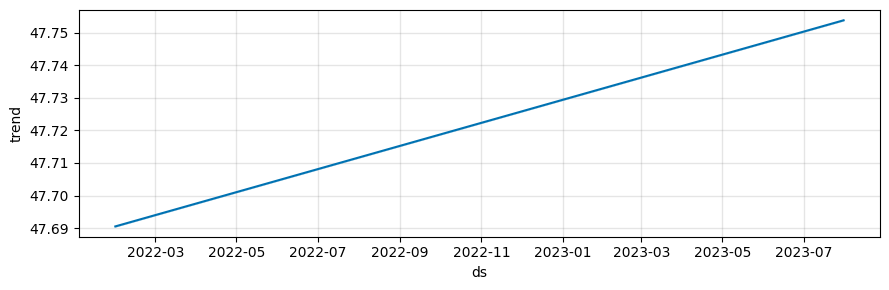

In [208]:
component=model.plot_components(forecast)

In [209]:
 model1=Prophet(interval_width=0.95)

In [210]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/2au76hhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/fvg9kvg1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12066', 'data', 'file=/tmp/tmpqki2d_87/2au76hhk.json', 'init=/tmp/tmpqki2d_87/fvg9kvg1.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model7ngn6ju4/prophet_model-20230421063631.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:36:31 - cmdstanpy - INFO - Chain [1] start processing
INF

In [211]:
future_dates=model1.make_future_dataframe(periods=10)

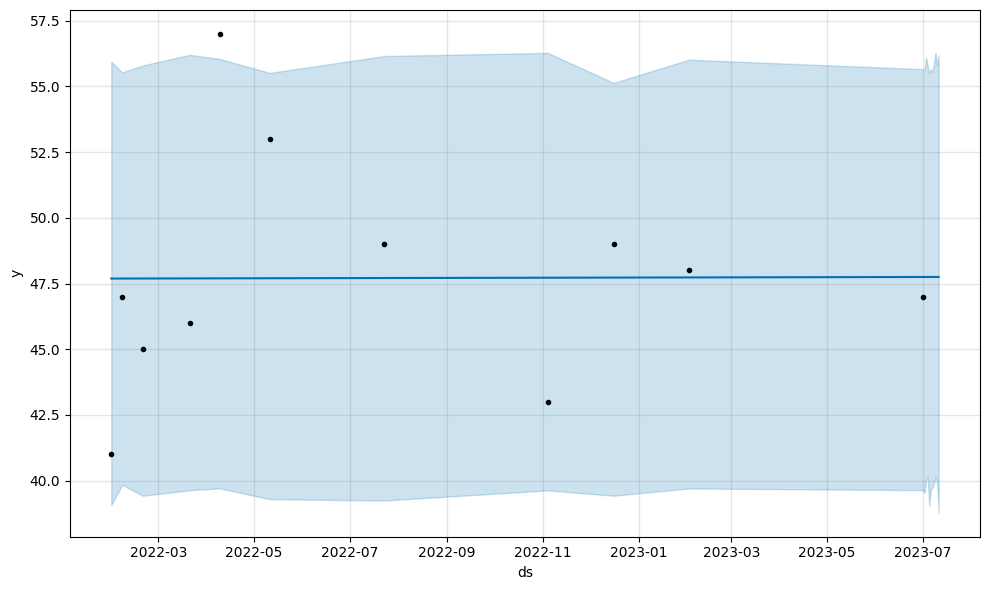

In [212]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-30  47.690532   39.066982   55.943625    47.690532    47.690532   
1  2022-02-06  47.691342   39.842145   55.536334    47.691342    47.691342   
2  2022-02-19  47.692845   39.423119   55.800604    47.692845    47.692845   
3  2022-03-21  47.696314   39.634741   56.204829    47.696314    47.696314   
4  2022-04-09  47.698511   39.706342   56.049337    47.698511    47.698511   
5  2022-05-11  47.702212   39.294681   55.517425    47.702212    47.702212   
6  2022-07-23  47.710654   39.241600   56.159444    47.710654    47.710654   
7  2022-11-04  47.722681   39.627794   56.279045    47.722681    47.722681   
8  2022-12-16  47.727538   39.426174   55.138806    47.727538    47.727538   
9  2023-02-02  47.733089   39.700797   56.020889    47.733089    47.733089   
10 2023-07-01  47.750320   39.637300   55.660242    47.750320    47.750320   
11 2023-07-02  47.750436   39.538011   55.651553    47.750436   

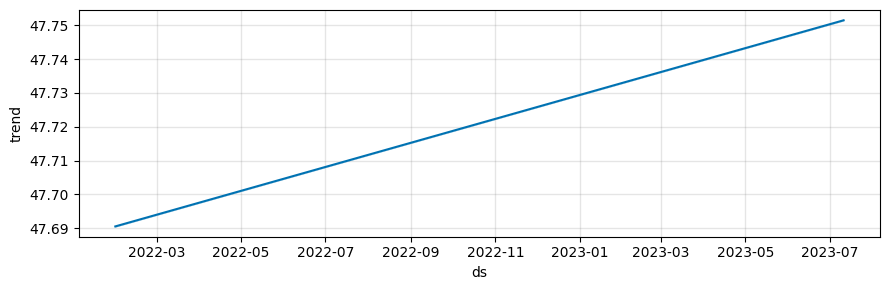

In [213]:
week=model1.plot_components(forecasting)
print(forecasting)